In [ ]:
import requests
url = "https://api.scryfall.com/cards/search?q=t%3Aplaneswalker+name%3AJace"

response = requests.get(url)
cards=response.json()
print(cards['total_cards'])


13


In [ ]:
import pandas as pd

cards=[]

links=["https://www.dropbox.com/s/k5vs1jux3rxbeeo/KTK_booster.txt?dl=1",
       "https://www.dropbox.com/s/k2vq8rswxhqgy4f/DTK_booster.txt?dl=1",
       "https://www.dropbox.com/s/ajhponzkzs5j1h0/FRF_booster.txt?dl=1", "https://www.dropbox.com/s/aufkqbps185f8pu/GTC_booster.txt?dl=1",
       "https://www.dropbox.com/s/x6eyg9fgpq2gjx6/RTR_booster.txt?dl=1", "https://www.dropbox.com/s/xlr0qdt0fk23soc/DGM_booster.txt?dl=1"]
boosterno=0
for link in range(len(links)):
  table=pd.read_table(links[link], header=None, names=["Name"])
  names=list(map(lambda name : name.split("1 ")[1], table["Name"].tolist()))

  block= ["KTK" if link<3 else "RTR"]

  for name in names:
    booster= links[link][-20:-17] + " " + str(boosterno//15)
    url="https://api.scryfall.com/cards/named?exact="+name
    response = requests.get(url)
    card=response.json()
    card_data={"Name": card["name"],
        "Type": card["type_line"],
        "CMC": card["cmc"],
        "Rarity": card["rarity"],
        "Set": card["set_name"],
        "Artist": card["artist"],
        "Text": card.get("oracle_text", ""),
        "Color": card["colors"],
        "Mana Cost": card["mana_cost"],
        "Block" : block[0],
        "Booster" : booster}

    cards.append(card_data)
    boosterno+=1

card_df = pd.DataFrame(cards)
card_df.iloc[:10]


,Name,Type,CMC,Rarity,Set,Artist,Text,Color,Mana Cost,Block,Booster
0,High Sentinels of Arashin,Creature — Bird Soldier,4.0,rare,Jumpstart,James Ryman,Flying\nHigh Sentinels of Arashin gets +1/+1 f...,[W],{3}{W},KTK,KTK 0
1,Armament Corps,Creature — Human Soldier,5.0,uncommon,Khans of Tarkir,Steven Belledin,"When Armament Corps enters the battlefield, di...","[B, G, W]",{2}{W}{B}{G},KTK,KTK 0
2,Bellowing Saddlebrute,Creature — Orc Warrior,4.0,uncommon,Khans of Tarkir,Torstein Nordstrand,Raid — When Bellowing Saddlebrute enters the b...,[B],{3}{B},KTK,KTK 0
3,Dragon Grip,Enchantment — Aura,3.0,uncommon,Khans of Tarkir,Jason Rainville,Ferocious — If you control a creature with pow...,[R],{2}{R},KTK,KTK 0
4,Swift Kick,Instant,4.0,common,Khans of Tarkir,Mathias Kollros,Target creature you control gets +1/+0 until e...,[R],{3}{R},KTK,KTK 0
5,Sultai Banner,Artifact,3.0,common,Khans of Tarkir,Daniel Ljunggren,"{T}: Add {B}, {G}, or {U}.\n{B}{G}{U}, {T}, Sa...",[],{3},KTK,KTK 0
6,Embodiment of Spring,Creature — Elemental,1.0,common,Khans of Tarkir,Wayne Reynolds,"{1}{G}, {T}, Sacrifice Embodiment of Spring: S...",[U],{U},KTK,KTK 0
7,Erase,Instant,1.0,common,Khans of Tarkir,Zack Stella,Exile target enchantment.,[W],{W},KTK,KTK 0
8,Mardu Warshrieker,Creature — Orc Shaman,4.0,common,Khans of Tarkir,Yefim Kligerman,Raid — When Mardu Warshrieker enters the battl...,[R],{3}{R},KTK,KTK 0
9,Sultai Scavenger,Creature — Bird Warrior,6.0,common,Khans of Tarkir,Anthony Palumbo,Delve (Each card you exile from your graveyard...,[B],{5}{B},KTK,KTK 0


In [ ]:
card_df['Color'] = card_df['Color'].astype(str)

card_df['Color'] = card_df['Color'].fillna("N")

import ast

card_df['Color'] = card_df['Color'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

card_df = card_df.explode('Color')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-156-d00e49383a50>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_mana_cards["Cluster"] = cluster_labels


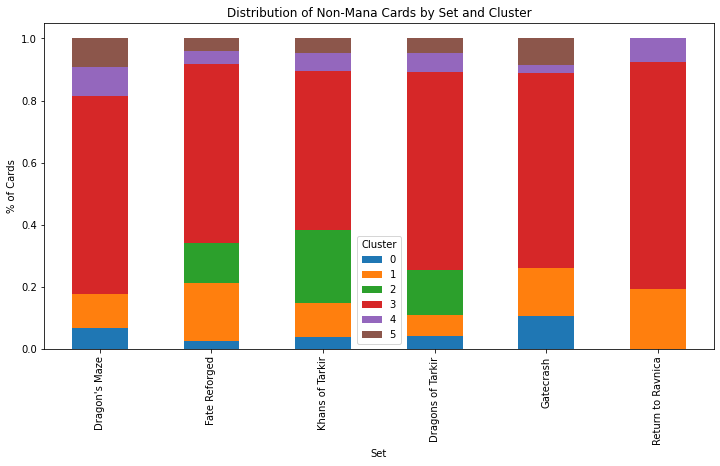

Cluster 0:
life, loses, opponent, extort, pay, equal, toughness, sacrifices, defender, battlefield
Cluster 1:
damage, deals, encoded, dealt, equal, combat, deathtouch, controller, exile, return
Cluster 2:
face, morph, time, cost, megamorph, manifest, turned, battlefield, counter, mana
Cluster 3:
creatures, flying, battlefield, counter, enters, trample, enchanted, power, untap, land
Cluster 4:
draw, add, sacrifice, cluestone, discard, noncreature, banner, dimir, untap, scribe
Cluster 5:
cards, graveyard, land, discards, library, choose, opponent, mills, hand, number


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Filter for only the 6 sets of interest
set_names = ["Dragon's Maze", "Fate Reforged", "Khans of Tarkir", "Dragons of Tarkir", "Gatecrash", "Return to Ravnica"]
non_mana_cards = card_df[(card_df["Type"].str.lower().str.contains("land") == False) & (card_df["Set"].isin(set_names))]
card_mechanics = non_mana_cards["Text"].fillna("")

# Fit KMeans model and generate clusters
stop_words = list(TfidfVectorizer(stop_words='english').get_stop_words()) + ["creature", "target", "control", "card", "cast", "spell", "player", "turn", "end", "gets", "gain", "gains"]
vectorizer = TfidfVectorizer(stop_words=stop_words)
card_matrix = vectorizer.fit_transform(card_mechanics)
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(card_matrix)

# Create stacked bar chart with 6 sets side-by-side
non_mana_cards["Cluster"] = cluster_labels
set_clusters = non_mana_cards.groupby(["Set", "Cluster"]).size().unstack(fill_value=0)
set_clusters_pct = set_clusters.div(set_clusters.sum(axis=1), axis=0)

set_clusters_pct.loc[set_names].plot(kind="bar", stacked=True, figsize=(12,6))
plt.xlabel("Set")
plt.ylabel("% of Cards")
plt.title("Distribution of Non-Mana Cards by Set and Cluster")
plt.show()

# Print the most common words for each cluster
cluster_centers = kmeans.cluster_centers_
order_centroids = cluster_centers.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(6):
    print("Cluster %d:" % i),
    print(", ".join([terms[ind] for ind in order_centroids[i, :10]]))



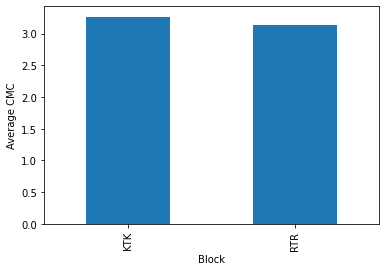

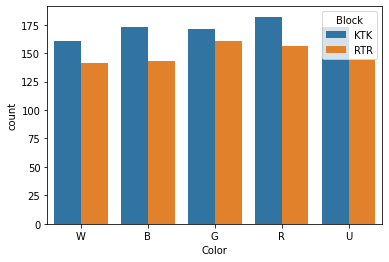

CMC                                              
       count      mean       std  min  25%  50%  75%   max
Block                                                     
KTK    994.0  3.266600  1.891932  0.0  2.0  3.0  5.0  10.0
RTR    839.0  3.131108  1.731216  0.0  2.0  3.0  4.0   9.0

In [ ]:

import matplotlib.pyplot as plt

avg_cmc_by_block = card_df.groupby("Block")["CMC"].mean()

fig, ax = plt.subplots()
avg_cmc_by_block.plot(kind="bar", ax=ax)
ax.set_xlabel("Block")
ax.set_ylabel("Average CMC")
plt.show()

import seaborn as sns

sns.countplot(x="Color", hue="Block", data=card_df)
plt.show()

card_df.groupby("Block").describe()



In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report


# Pre-processing step to map any color not in ['W', 'B', 'U', 'R', 'G'] to 'N'
card_df['Color'] = card_df['Color'].map(lambda c: c if c in ['W', 'B', 'U', 'R', 'G'] else 'N')

# create a dictionary to hold the data
booster_data = {"Booster": [], "Average CMC": [], "Block": [], "W": [], "B": [], "U": [], "R": [], "G": [], "N": [], "common": [], "uncommon": [], "rare": []}

# get all unique colors in the dataset
all_colors=pd.unique(card_df["Color"])

# iterate through each booster and calculate the average CMC, color frequencies, and rarity frequencies
for booster in card_df["Booster"].unique():
    # filter for only cards in the current booster
    booster_df = card_df[card_df["Booster"] == booster]

    # calculate the average CMC
    avg_cmc = booster_df["CMC"].mean()

    # calculate the frequency of each color and sort in descending order
    color_counts = booster_df["Color"].apply(lambda x: pd.Series(x).value_counts()).sum().sort_values(ascending=False)

    # calculate the frequency of each rarity
    rarity_counts = booster_df["Rarity"].value_counts()

    # add the booster and calculated data to the dictionary
    booster_data["Booster"].append(booster)
    booster_data["Average CMC"].append(avg_cmc)
    booster_data["Block"].append(booster_df['Block'].unique()[0])

    # add the frequency of each color to the dictionary (as separate columns)
    for color in all_colors:
        if color in color_counts.index:
            booster_data[color].append(color_counts[color])
        else:
            booster_data[color].append(0)

    # add the frequency of each rarity to the dictionary (as separate columns)
    for rarity in ["common", "uncommon", "rare"]:
        if rarity in rarity_counts.index:
            booster_data[rarity].append(rarity_counts[rarity])
        else:
            booster_data[rarity].append(0)

# create a new DataFrame from the dictionary
booster_summary = pd.DataFrame(booster_data)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(booster_summary.drop('Block', axis=1), booster_summary['Block'], test_size=0.3, random_state=42)

# select the relevant columns for the X_train dataset
X_train = booster_summary[["Average CMC", "W", "B", "U", "R", "G", "N", "common", "uncommon", "rare"]]

# set the y_train dataset
y_train = booster_summary["Block"]

# create a column transformer to standardize the input data
ct = make_column_transformer(
    (StandardScaler(), ["Average CMC", "W", "B", "U", "R", "G", "N", "common", "uncommon", "rare"]),
    remainder="drop"
)

model = make_pipeline(
    ct,
    KNeighborsClassifier(n_neighbors=5)
)

model.fit(X=X_train, y=y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

         KTK       0.90      0.95      0.92        19
         RTR       0.91      0.83      0.87        12

    accuracy                           0.90        31
   macro avg       0.90      0.89      0.90        31
weighted avg       0.90      0.90      0.90        31

